<a href="https://colab.research.google.com/github/hilalongel/DSA-210-project/blob/main/scraping%26EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install necessary libraries
!pip install pandas requests beautifulsoup4


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time


In [ ]:
## Define Scraping Function


In [ ]:
def scrape_weekend_boxoffice(year, week):
    url = f"https://boxofficeturkiye.com/hafta-sonu/detay/{year}-{week}"
    print(f"Checking URL: {url}")
    response = requests.get(url)
    if response.status_code != 200:
        print(f" Failed to retrieve data for {year} Week {week} (Status code: {response.status_code})")
        return None

    soup = BeautifulSoup(response.content, "html.parser")
    table = soup.find("table", {"class": "box-office-table"})
    if not table:
        print(f" No data table found at URL: {url}")
        return None

    movies, viewers = [], []
    rows = table.find_all("tr")[1:]
    for row in rows[:10]:
        cols = row.find_all("td")
        if len(cols) >= 4:
            movie_title = cols[1].text.strip()
            viewer_count = cols[3].text.strip().replace('.', '').replace(',', '')
            try:
                viewer_count = int(viewer_count)
            except ValueError:
                viewer_count = None
            movies.append(movie_title)
            viewers.append(viewer_count)

    week_data = pd.DataFrame({
        "Year": [year]*len(movies),
        "Week": [week]*len(movies),
        "Movie": movies,
        "Viewers": viewers
    })
    return week_data


In [ ]:
## Scrape Data


In [ ]:
years_to_scrape = [ 2022, 2023, 2024]
weeks_range = range(1, 53)  # Assuming 52 weeks max (adjust if needed)

for year in years_to_scrape:
    print(f"Starting scraping for {year}...")
    yearly_data = pd.DataFrame()
    for week in weeks_range:
        data = scrape_weekend_boxoffice(year, week)
        if data is not None:
            yearly_data = pd.concat([yearly_data, data], ignore_index=True)
        time.sleep(1)
    # Save each year's data
    filename = f"weekend_boxoffice_{year}.csv"
    yearly_data.to_csv(filename, index=False)
    print(f" Finished {year}, saved to {filename}")


 Starting scraping for 2022...
Checking URL: https://boxofficeturkiye.com/hafta-sonu/detay/2022-1
Checking URL: https://boxofficeturkiye.com/hafta-sonu/detay/2022-2
Checking URL: https://boxofficeturkiye.com/hafta-sonu/detay/2022-3
Checking URL: https://boxofficeturkiye.com/hafta-sonu/detay/2022-4
Checking URL: https://boxofficeturkiye.com/hafta-sonu/detay/2022-5
Checking URL: https://boxofficeturkiye.com/hafta-sonu/detay/2022-6
Checking URL: https://boxofficeturkiye.com/hafta-sonu/detay/2022-7
Checking URL: https://boxofficeturkiye.com/hafta-sonu/detay/2022-8
Checking URL: https://boxofficeturkiye.com/hafta-sonu/detay/2022-9
Checking URL: https://boxofficeturkiye.com/hafta-sonu/detay/2022-10
Checking URL: https://boxofficeturkiye.com/hafta-sonu/detay/2022-11
Checking URL: https://boxofficeturkiye.com/hafta-sonu/detay/2022-12
Checking URL: https://boxofficeturkiye.com/hafta-sonu/detay/2022-13
Checking URL: https://boxofficeturkiye.com/hafta-sonu/detay/2022-14
Checking URL: https://boxo

Saving weekend_boxoffice_2022.csv to weekend_boxoffice_2022.csv
Saving weekend_boxoffice_2023.csv to weekend_boxoffice_2023.csv
Saving weekend_boxoffice_2024.csv to weekend_boxoffice_2024.csv
Not found in both languages: Enkanto: Sihirli Dünya
Not found in both languages: Enkanto: Sihirli Dünya
Not found in both languages: Masal Zamanı "Melez Prenses"
Not found in both languages: Orman Vatandır - Çanakkale Ruhu
Not found in both languages: Doktor Strange Çoklu Evren Çılgınlığında
Not found in both languages: Doktor Strange Çoklu Evren Çılgınlığında
Not found in both languages: Doktor Strange Çoklu Evren Çılgınlığında
Not found in both languages: Doktor Strange Çoklu Evren Çılgınlığında
Not found in both languages: Doktor Strange Çoklu Evren Çılgınlığında
Not found in both languages: Doktor Strange Çoklu Evren Çılgınlığında
Not found in both languages: Doktor Strange Çoklu Evren Çılgınlığında
Not found in both languages: Doktor Strange Çoklu Evren Çılgınlığında

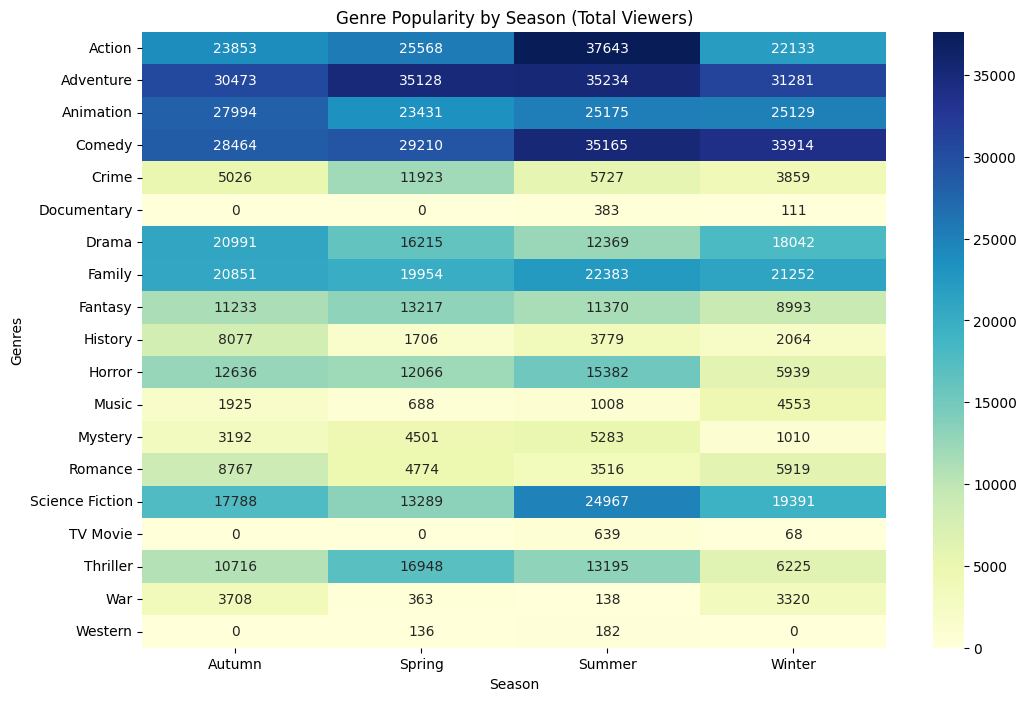

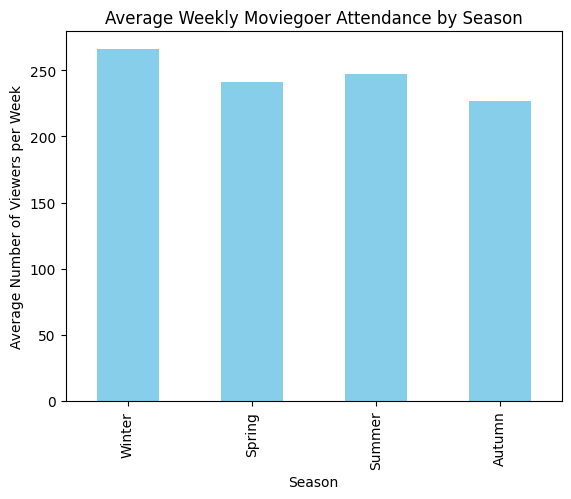

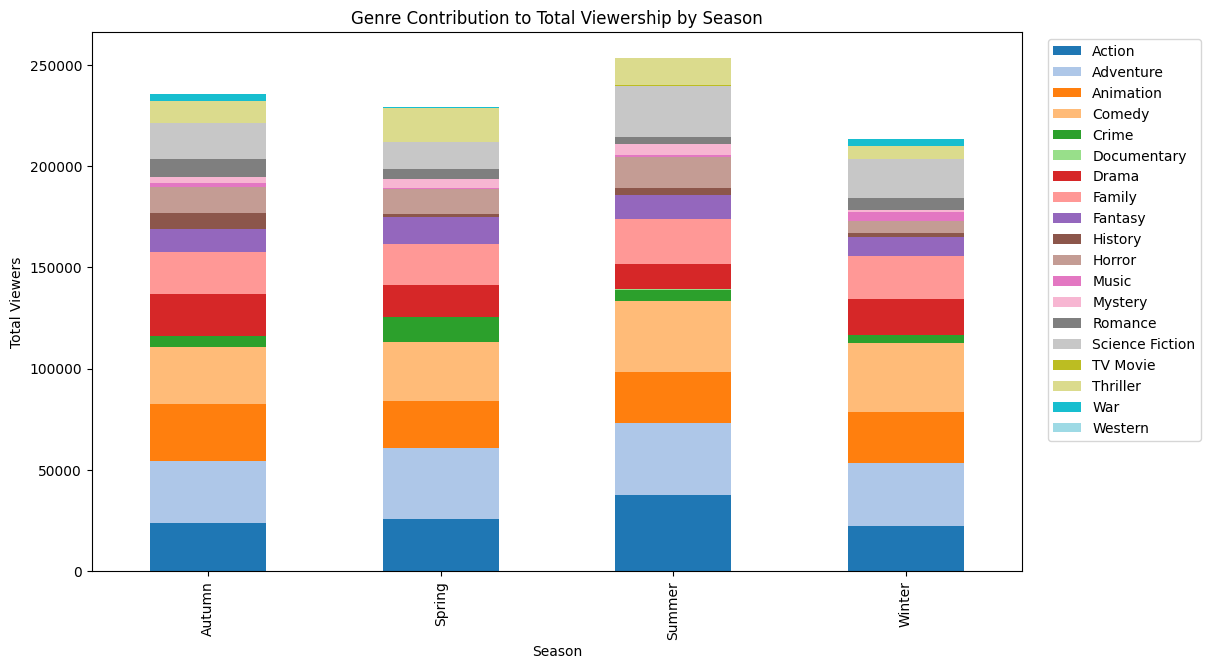

<ipython-input-1-141f2418082f>:107: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=exploded_df, x='Season', y='Viewers', order=['Winter', 'Spring', 'Summer', 'Autumn'], palette="pastel")


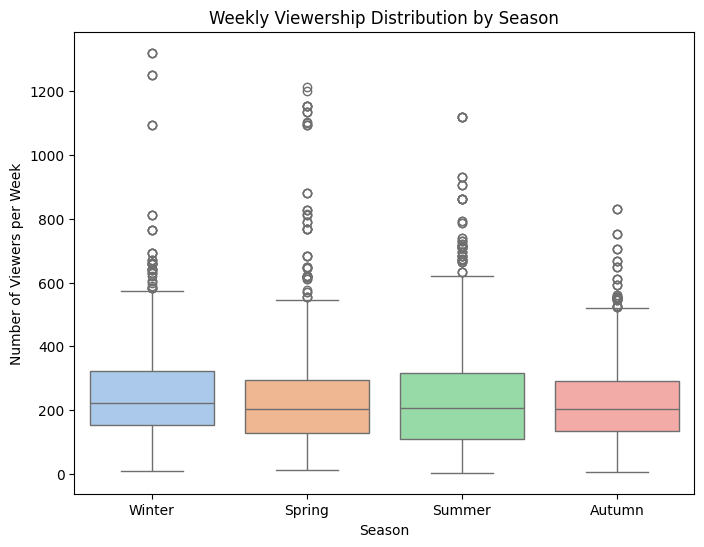


ANOVA F-statistic: 8.23, p-value: 0.0000
 Significant difference between seasons (reject null hypothesis).


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install pandas numpy matplotlib seaborn scipy tmdbsimple

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import tmdbsimple as tmdb
import time
import re
from google.colab import files

tmdb.API_KEY = "254ce10fccfa71bbfc4e7281ccd47730"

def clean_movie_title(title):
    cleaned_title = re.sub(r"\d{1,2} [A-Za-zçğıöşüÇĞİÖŞÜ]+ \d{4}", "", title)
    cleaned_title = cleaned_title.replace("\n", " ").strip()
    return cleaned_title

def get_movie_genre_auto_language(movie_title):
    cleaned_title = clean_movie_title(movie_title)
    search = tmdb.Search()
    response = search.movie(query=cleaned_title, language="tr-TR")
    time.sleep(0.3)
    if response['results']:
        movie_id = response['results'][0]['id']
        movie = tmdb.Movies(movie_id)
        details = movie.info()
        genres = [genre['name'] for genre in details.get('genres', [])]
        return genres
    search = tmdb.Search()
    response = search.movie(query=cleaned_title, language="en-US")
    time.sleep(0.3)
    if response['results']:
        movie_id = response['results'][0]['id']
        movie = tmdb.Movies(movie_id)
        details = movie.info()
        genres = [genre['name'] for genre in details.get('genres', [])]
        return genres
    print(f"Not found in both languages: {cleaned_title}")
    return ["Unknown"]

uploaded = files.upload()
df_2022 = pd.read_csv("weekend_boxoffice_2022.csv")
df_2023 = pd.read_csv("weekend_boxoffice_2023.csv")
df_2024 = pd.read_csv("weekend_boxoffice_2024.csv")

combined_df = pd.concat([df_2022, df_2023, df_2024], ignore_index=True)
combined_df['Cleaned_Movie'] = combined_df['Movie'].apply(clean_movie_title)
combined_df['Genres_List'] = combined_df['Cleaned_Movie'].apply(get_movie_genre_auto_language)

def assign_season(week):
    if 1 <= week <= 8 or week >= 49:
        return 'Winter'
    elif 9 <= week <= 21:
        return 'Spring'
    elif 22 <= week <= 34:
        return 'Summer'
    else:
        return 'Autumn'

combined_df['Season'] = combined_df['Week'].apply(assign_season)


exploded_df = combined_df.explode('Genres_List')
exploded_df = exploded_df[exploded_df['Genres_List'] != "Unknown"]



seasonal_total = exploded_df.groupby('Season')['Viewers'].sum().reindex(['Winter', 'Spring', 'Summer', 'Autumn'])
most_popular_season = seasonal_total.idxmax()
print(f"\n The season with the highest total number of moviegoers is: {most_popular_season}")
print(seasonal_total)

genre_season = exploded_df.groupby(['Season', 'Genres_List']).agg({'Viewers': 'sum'}).reset_index()
pivot = genre_season.pivot(index='Genres_List', columns='Season', values='Viewers').fillna(0)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Genre Popularity by Season (Total Viewers)")
plt.ylabel("Genres")
plt.xlabel("Season")
plt.show()



seasonal_viewers = exploded_df.groupby('Season')['Viewers'].mean().reindex(['Winter', 'Spring', 'Summer', 'Autumn'])
seasonal_viewers.plot(kind='bar', title="Average Weekly Moviegoer Attendance by Season", color='skyblue')
plt.ylabel("Average Number of Viewers per Week")
plt.xlabel("Season")
plt.show()



# Stacked Bar Chart: Genre Contribution by Season
genre_season = exploded_df.groupby(['Season', 'Genres_List']).agg({'Viewers': 'sum'}).reset_index()
pivot = genre_season.pivot(index='Season', columns='Genres_List', values='Viewers').fillna(0)
pivot.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='tab20')
plt.title("Genre Contribution to Total Viewership by Season")
plt.ylabel("Total Viewers")
plt.xlabel("Season")
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

# Boxplot: Weekly Viewership Distribution by Season
plt.figure(figsize=(8,6))
sns.boxplot(data=exploded_df, x='Season', y='Viewers', order=['Winter', 'Spring', 'Summer', 'Autumn'], palette="pastel")
plt.title("Weekly Viewership Distribution by Season")
plt.ylabel("Number of Viewers per Week")
plt.show()


groups = [exploded_df[exploded_df['Season'] == season]['Viewers'].dropna() for season in exploded_df['Season'].unique()]
f_stat, p_val = stats.f_oneway(*groups)
print(f"\nANOVA F-statistic: {f_stat:.2f}, p-value: {p_val:.4f}")
if p_val < 0.05:
    print(" Significant difference between seasons (reject null hypothesis).")
else:
    print(" No significant difference between seasons (fail to reject null hypothesis).")

exploded_df.to_csv("final_exploded_boxoffice_with_genres_and_seasons.csv", index=False)
files.download("final_exploded_boxoffice_with_genres_and_seasons.csv")
